In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
# Import Dataset
dataset = pd.read_csv('dataset.csv')
x = dataset.iloc[:, -1].values
y = dataset.iloc[:, 1].values

In [3]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [4]:
# Split Dataset into Training and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [5]:
# Text Vectorization
vectorize_layer = tf.keras.layers.TextVectorization(
    standardize='lower_and_strip_punctuation',
    max_tokens=20000,
    output_mode='int',
    output_sequence_length=1000,
)
vectorize_layer.adapt(x_train)

2023-02-06 17:59:11.896608: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [6]:
# Build Model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)
model.add(tf.keras.layers.Embedding(input_dim=20001, output_dim=128))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=25, batch_size=32)

Epoch 1/25
152/152 [==============================] - 4s 26ms/step - loss: 0.9882 - accuracy: 0.5522 - val_loss: 0.8307 - val_accuracy: 0.7393
Epoch 2/25
152/152 [==============================] - 4s 26ms/step - loss: 0.6942 - accuracy: 0.8241 - val_loss: 0.5699 - val_accuracy: 0.8944
Epoch 3/25
152/152 [==============================] - 4s 26ms/step - loss: 0.5012 - accuracy: 0.8873 - val_loss: 0.4229 - val_accuracy: 0.9266
Epoch 4/25
152/152 [==============================] - 4s 26ms/step - loss: 0.3725 - accuracy: 0.9143 - val_loss: 0.3180 - val_accuracy: 0.9389
Epoch 5/25
152/152 [==============================] - 4s 26ms/step - loss: 0.2820 - accuracy: 0.9360 - val_loss: 0.2443 - val_accuracy: 0.9455
Epoch 6/25
152/152 [==============================] - 4s 26ms/step - loss: 0.2184 - accuracy: 0.9467 - val_loss: 0.1927 - val_accuracy: 0.9579
Epoch 7/25
152/152 [==============================] - 4s 28ms/step - loss: 0.1759 - accuracy: 0.9517 - val_loss: 0.1558 - val_accuracy: 0.9620

In [8]:
model.evaluate(x_test, y_test, batch_size=32)

48/48 [==============================] - 1s 14ms/step - loss: 0.0508 - accuracy: 0.9822


[0.0508292019367218, 0.9821664690971375]

In [9]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
print(cm)
accuracy_score(y_test, y_pred.argmax(axis=1))

48/48 [==============================] - 1s 13ms/step
[[504   0   4]
 [  0 433   0]
 [ 23   0 550]]


0.9821664464993395

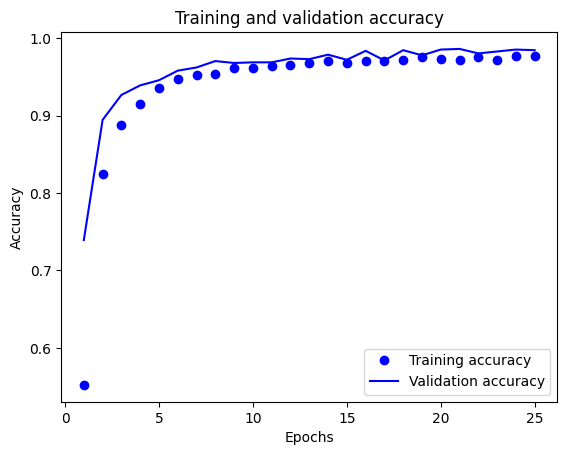

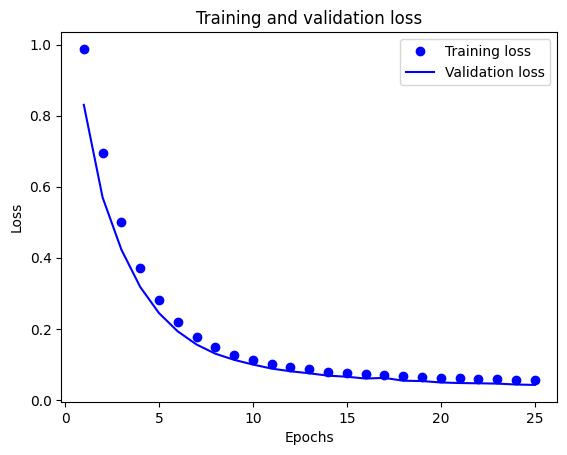

In [10]:
# Visualize Outcome

import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()